In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
result_0652011 = pd.read_csv('results/result_0.0650211.csv')['201610']
result_0653812 = pd.read_csv('results/result_0.0653812.csv')['201610']

In [13]:
plt.figure(figsize=(16, 6))
plt.plot(range(len(result_0652011)), result_0652011, '.')

In [18]:
length = len(result_0652011)

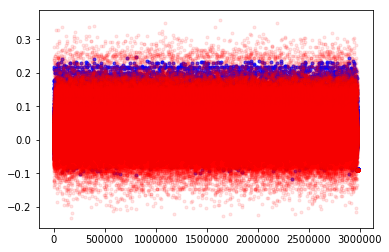

In [24]:
plt.close()
plt.figure(figsize=(32, 12))
fig, ax = plt.subplots()
ax.plot(range(length), result_0652011, '.', color='b', alpha=0.7)
ax.plot(range(length), result_0653812, '.', color='r', alpha=0.1)
plt.show()

In [40]:
y_pred.shape

(2985217,)

# Artificial result

In [25]:
result_0652011 = pd.read_csv('results/result_0.0650211.csv')

In [34]:
y_pred = result_0652011['201610']
mean_value = np.mean(y_pred)

In [42]:
y_pred.quantile(0.000005)

-0.0935959226799011

In [50]:
upper_quan = y_pred.quantile(0.99999)
upper_quan

0.2302524745464325

In [51]:
y_pred[:10]

0   -0.012167
1   -0.022837
2    0.042622
3    0.022563
4   -0.015114
5    0.000043
6   -0.022314
7   -0.004850
8   -0.015100
9   -0.006134
Name: 201610, dtype: float64

In [52]:
y_pred[y_pred>= upper_quan] = 0.95*y_pred[y_pred>= upper_quan] + 0.05*mean_value

/Users/Leslie/anaconda3/lib/python3.5/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [53]:
sub = pd.read_csv('sample_submission.csv')
for c in sub.columns[sub.columns != 'ParcelId']:
    sub[c] = y_pred

sub.to_csv('result.csv', index=False, float_format='%.8f')